### Importing Packages

In [1]:
# basic packages
import copy
import time
import math
import warnings

# standard packages
import pylab as pl
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tick

# keras package
from keras.utils import np_utils
from keras.models import Sequential
from keras import initializers as init
from keras.layers import Activation,Dense,Dropout
from keras.wrappers.scikit_learn import KerasClassifier

# sklearn package
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer,accuracy_score,f1_score
from sklearn.model_selection import train_test_split,GridSearchCV

Using TensorFlow backend.


### User Defined Functions

##### ANN - 2 Hidden Layers

In [2]:
def ann_2hid(X_train,y_train,in_dims,parameters,cv=3):
    def clf2(hidden_actfunc,hidden_units_1,hidden_units_2):
        clf = Sequential()
        clf.add(Dense(hidden_units_1,activation=hidden_actfunc,input_dim=in_dims))
        clf.add(Dropout(0.5))
        clf.add(Dense(hidden_units_2,activation=hidden_actfunc))
        clf.add(Dropout(0.5))
        clf.add(Dense(1,activation='sigmoid'))
        clf.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])
        return clf

    neural_nets = KerasClassifier(build_fn=clf2,verbose=0)
    grid_search = GridSearchCV(neural_nets,parameters,scoring='accuracy',cv=cv).fit(X_train,y_train)
    return grid_search
    
def ann2_grid(train,test,grid_search):
    X_train,X_test = train.iloc[:,:-1],test.iloc[:,:-1]
    y_train,y_test = train.iloc[:,-1],test.iloc[:,-1]
    y_pred_train,y_pred_test = grid_search.predict(X_train),grid_search.predict(X_test)
    print('test accuracy of best model :',np.round(accuracy_score(y_test,y_pred_test),4))
    
    hidden_actfunc = pd.Series(grid_search.cv_results_['param_hidden_actfunc'].data)
    hidden_units_1 = pd.Series(grid_search.cv_results_['param_hidden_units_1'].data)
    hidden_units_2 = pd.Series(grid_search.cv_results_['param_hidden_units_2'].data)
    batch_size   = pd.Series(grid_search.cv_results_['param_batch_size'].data)
    epochs       = pd.Series(grid_search.cv_results_['param_epochs'].data)
    cvl_accuracy = pd.Series(grid_search.cv_results_['mean_test_score'])
    time_elapsed = pd.Series(grid_search.cv_results_['mean_fit_time'])
    
    df = pd.concat([hidden_actfunc,hidden_units_1,hidden_units_2,batch_size,epochs,1-cvl_accuracy,time_elapsed],axis=1)
    df.columns = ['hidden_activation','hidden_units_1','hidden_units_2','batch_size','epochs','cv_error','run_time']
    return df,y_pred_train,y_pred_test

def ann2_best(train,test,parameters,cv=3):
    X_train,X_test = train.iloc[:,:-1],test.iloc[:,:-1]
    y_train,y_test = train.iloc[:,-1],test.iloc[:,-1]
    train_error_rate,test_error_rate = [],[]
    train_size,run_time = [],[]
    
    for size in list(np.arange(0.1,0.6,0.1)):
        time_0 = time.clock()
        n_rows = math.floor(size*X_train.shape[0])
        Xtrain = X_train.head(n_rows)
        ytrain = y_train[:n_rows]
        
        grid_search  = ann_2hid(Xtrain,ytrain,Xtrain.shape[1],parameters,cv=cv)
        y_pred_train = grid_search.predict(Xtrain)
        y_pred_test  = grid_search.predict(X_test)
        train_error  = 1-accuracy_score(ytrain,y_pred_train)
        test_error   = 1-accuracy_score(y_test,y_pred_test)
        time_taken   = round(time.clock()-time_0,4)
        
        train_error_rate.append(train_error)
        test_error_rate.append(test_error)
        run_time.append(time_taken)
        train_size.append(size)
    
    dt = list(zip(train_size,train_error_rate,test_error_rate,run_time))
    df = pd.DataFrame(dt,columns=['train_size','train_error','test_error','run_time'])
    return df

##### ANN - 3 Hidden Layers

In [3]:
def ann_3hid(X_train,y_train,in_dims,parameters,cv=3):
    def clf3(hidden_actfunc,hidden_units_1,hidden_units_2,hidden_units_3):
        clf = Sequential()
        clf.add(Dense(hidden_units_1,activation=hidden_actfunc,input_dim=in_dims))
        clf.add(Dropout(0.5))
        clf.add(Dense(hidden_units_2,activation=hidden_actfunc))
        clf.add(Dropout(0.5))
        clf.add(Dense(hidden_units_3,activation=hidden_actfunc))
        clf.add(Dropout(0.5))
        clf.add(Dense(1,activation='sigmoid'))
        clf.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])
        return clf

    neural_nets = KerasClassifier(build_fn=clf3,verbose=0)
    grid_search = GridSearchCV(neural_nets,parameters,scoring='accuracy',cv=cv).fit(X_train,y_train)
    return grid_search
    
def ann3_grid(train,test,grid_search):
    X_train,X_test = train.iloc[:,:-1],test.iloc[:,:-1]
    y_train,y_test = train.iloc[:,-1],test.iloc[:,-1]    
    y_pred_train,y_pred_test = grid_search.predict(X_train),grid_search.predict(X_test)
    print('test accuracy of best model :',np.round(accuracy_score(y_test,y_pred_test),4))
    
    hidden_actfunc = pd.Series(grid_search.cv_results_['param_hidden_actfunc'].data)
    hidden_units_1 = pd.Series(grid_search.cv_results_['param_hidden_units_1'].data)
    hidden_units_2 = pd.Series(grid_search.cv_results_['param_hidden_units_2'].data)
    hidden_units_3 = pd.Series(grid_search.cv_results_['param_hidden_units_3'].data)
    batch_size   = pd.Series(grid_search.cv_results_['param_batch_size'].data)
    epochs       = pd.Series(grid_search.cv_results_['param_epochs'].data)
    cvl_accuracy = pd.Series(grid_search.cv_results_['mean_test_score'])
    time_elapsed = pd.Series(grid_search.cv_results_['mean_fit_time'])
    
    df = pd.concat([hidden_actfunc,hidden_units_1,hidden_units_2,hidden_units_3,
                    batch_size,epochs,1-cvl_accuracy,time_elapsed],axis=1)
    df.columns = ['hidden_activation','hidden_units_1','hidden_units_2','hidden_units_3',
                  'batch_size','epochs','cv_error','run_time']
    return df,y_pred_train,y_pred_test

def ann3_best(train,test,parameters,cv=3):
    X_train,X_test = train.iloc[:,:-1],test.iloc[:,:-1]
    y_train,y_test = train.iloc[:,-1],test.iloc[:,-1]
    train_error_rate,test_error_rate = [],[]
    train_size,run_time = [],[]
    
    for size in list(np.arange(0.1,0.5,0.1)):
        time_0 = time.clock()
        n_rows = math.floor(size*X_train.shape[0])
        Xtrain = X_train.head(n_rows)
        ytrain = y_train[:n_rows]
        
        grid_search  = ann_3hid(Xtrain,ytrain,Xtrain.shape[1],parameters,cv=cv)
        y_pred_train = grid_search.predict(Xtrain)
        y_pred_test  = grid_search.predict(X_test)
        train_error  = 1-accuracy_score(ytrain,y_pred_train)
        test_error   = 1-accuracy_score(y_test,y_pred_test)
        time_taken   = round(time.clock()-time_0,4)
        
        train_error_rate.append(train_error)
        test_error_rate.append(test_error)
        run_time.append(time_taken)
        train_size.append(size)
    
    dt = list(zip(train_size,train_error_rate,test_error_rate,run_time))
    df = pd.DataFrame(dt,columns=['train_size','train_error','test_error','run_time'])
    return df

##### K - Nearest Neighbors

In [4]:
def knn(train,test,cv=3,max_k=10,max_p=3,algorithm='kd_tree'):
    X_train,X_test = train.iloc[:,:-1],test.iloc[:,:-1]
    y_train,y_test = train.iloc[:,-1],test.iloc[:,-1]
    
    k_neighbors = KNeighborsClassifier(algorithm=algorithm,metric='minkowski')
    params_grid = {'n_neighbors':range(1,1+max_k),'weights':['uniform','distance'],'p':range(1,1+max_p)}
    grid_search = GridSearchCV(k_neighbors,params_grid,scoring='accuracy',cv=cv).fit(X_train,y_train)
    y_pred_train,y_pred_test = grid_search.predict(X_train),grid_search.predict(X_test)
    print('test accuracy of best model :',np.round(accuracy_score(y_test,y_pred_test),4))
    
    neighbors = pd.Series(grid_search.cv_results_['param_n_neighbors'].data)
    weights = pd.Series(grid_search.cv_results_['param_weights'].data)
    p = pd.Series(grid_search.cv_results_['param_p'].data)
    cvl_accuracy = pd.Series(grid_search.cv_results_['mean_test_score'])
    time_elapsed = pd.Series(grid_search.cv_results_['mean_fit_time'])
    
    df = pd.concat([neighbors,weights,p,1-cvl_accuracy,time_elapsed],axis=1)
    df.columns = ['neighbors','weights','p','cv_error','run_time']
    return df,y_pred_train,y_pred_test

def knn_best(train,test,neighbors,weights,p,algorithm='kd_tree'):
    X_train,X_test = train.iloc[:,:-1],test.iloc[:,:-1]
    y_train,y_test = train.iloc[:,-1],test.iloc[:,-1]
    train_error_rate,test_error_rate = [],[]
    train_size,run_time = [],[]
    
    for size in list(np.arange(0.1,1,0.1)):
        time_0 = time.clock()
        n_rows = math.floor(size*X_train.shape[0])
        Xtrain = X_train.head(n_rows)
        ytrain = y_train[:n_rows]
        
        knn_best_clf = KNeighborsClassifier(n_neighbors=neighbors,weights=weights,p=p,algorithm=algorithm).fit(Xtrain,ytrain)
        y_pred_train = knn_best_clf.predict(Xtrain)
        y_pred_test  = knn_best_clf.predict(X_test)
        train_error  = 1-accuracy_score(ytrain,y_pred_train)
        test_error   = 1-accuracy_score(y_test,y_pred_test)
        time_taken   = round(time.clock()-time_0,4)
        
        train_error_rate.append(train_error)
        test_error_rate.append(test_error)
        run_time.append(time_taken)
        train_size.append(size)
    
    dt = list(zip(train_size,train_error_rate,test_error_rate,run_time))
    df = pd.DataFrame(dt,columns=['train_size','train_error','test_error','run_time'])
    return df

### Data Preprocessing

##### Dataset 1 - Appliances Energy Prediction

Response classes in train set
 0    8582
1    7206
Name: Heavy_Appliances, dtype: int64

Response classes in test set
 0    2162
1    1785
Name: Heavy_Appliances, dtype: int64


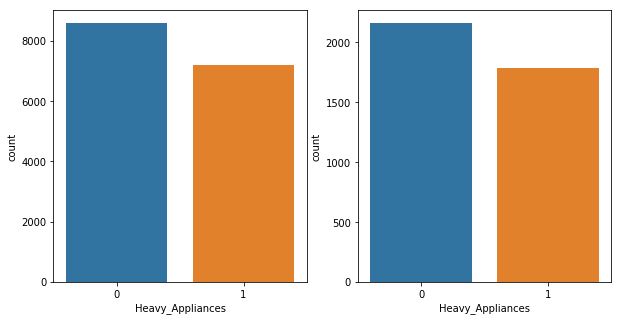

In [5]:
# ignoring warnings
warnings.filterwarnings('ignore')

# importing dataset
data1 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')
data1 = data1.iloc[:,1:-2]

# splitting into train & test
train1,test1 = train_test_split(data1,test_size=0.2,random_state=3421107)

# classifying response > median
train1['Heavy_Appliances'] = np.where(train1.Appliances > train1.Appliances.median(),1,0)
test1['Heavy_Appliances']  = np.where(test1.Appliances > train1.Appliances.median(),1,0)

# splitting datasets into X,y
X_train1,X_test1 = train1.iloc[:,1:-1],test1.iloc[:,1:-1]
y_train1,y_test1 = train1.iloc[:,-1],test1.iloc[:,-1]

# normalizing into [0,1] range
X_train1 = (X_train1-X_train1.min())/(X_train1.max()-X_train1.min())
X_test1  = (X_test1-X_train1.min())/(X_train1.max()-X_train1.min())

# combining normalized X and y
train1,test1 = pd.concat([X_train1,y_train1],axis=1),pd.concat([X_test1,y_test1],axis=1)

# frequency of response classes
print('Response classes in train set\n',y_train1.value_counts())
print('\nResponse classes in test set\n',y_test1.value_counts())
fig,axes = plt.subplots(1,2,figsize=(10,5))
sns.countplot(train1.Heavy_Appliances,ax=axes[0])
sns.countplot(test1.Heavy_Appliances,ax=axes[1])
plt.show()

In [6]:
train1.describe().T

,count,mean,std,min,25%,50%,75%,max
lights,15788.0,0.054291,0.112967,0.0,0.000000,0.000000,0.000000,1.0
T1,15788.0,0.517640,0.170297,0.0,0.419219,0.507920,0.613516,1.0
RH_1,15788.0,0.401901,0.122716,0.0,0.311626,0.383642,0.487725,1.0
T2,15788.0,0.308402,0.160223,0.0,0.195542,0.283499,0.392537,1.0
RH_2,15788.0,0.559556,0.114861,0.0,0.488381,0.561765,0.638842,1.0
T3,15788.0,0.421267,0.167271,0.0,0.298272,0.407112,0.505982,1.0
RH_3,15788.0,0.489153,0.151620,0.0,0.380122,0.456101,0.604456,1.0
T4,15788.0,0.518808,0.184682,0.0,0.398649,0.501502,0.630631,1.0
RH_4,15788.0,0.484646,0.184940,0.0,0.335894,0.459809,0.616475,1.0
T5,15788.0,0.408261,0.176924,0.0,0.282848,0.387960,0.506769,1.0


##### Dataset 2 - Online Shoppers Purchasing Intention

Response classes in train set
 0    8322
1    1542
Name: Revenue, dtype: int64

Response classes in test set
 0    2100
1     366
Name: Revenue, dtype: int64


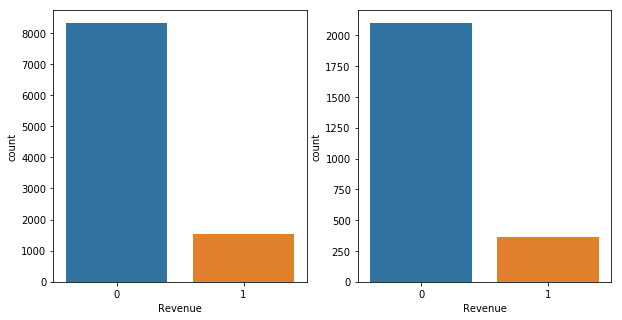

In [7]:
# ignoring warnings
warnings.filterwarnings('ignore')

# importing dataset
data2 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv')

# creating dummies
for i in range (10,16):
    dummy = pd.get_dummies(data2[data2.columns[i]],prefix=data2.columns[i])
    data2 = pd.concat([data2,dummy],axis=1)
cols2 = data2.columns
data2 = pd.concat([data2[list(cols2[:10])],data2.Weekend.astype(int),data2[list(cols2[18:])],data2.Revenue.astype(int)],axis=1)
data2 = data2.rename(columns={'VisitorType_New_Visitor':'VisitorType_New','VisitorType_Returning_Visitor':'VisitorType_Return'})

# splitting into train & test
train2,test2 = train_test_split(data2,test_size=0.2,random_state=3421107)

# splitting datasets into X,y
X_train2,X_test2 = train2.iloc[:,:-1],test2.iloc[:,:-1]
y_train2,y_test2 = train2.iloc[:,-1],test2.iloc[:,-1]

# separating numeric features
train_num,train_dum = X_train2.iloc[:,:10],X_train2.iloc[:,10:]

# normalizing into [0,1] range
X_train2.iloc[:,:10] = (X_train2.iloc[:,:10]-train_num.min())/(train_num.max()-train_num.min())
X_test2.iloc[:,:10]  = (X_test2.iloc[:,:10]-train_num.min())/(train_num.max()-train_num.min())
X_train2.iloc[:,10:] = (X_train2.iloc[:,10:]-train_dum.min())/(train_dum.max()-train_dum.min())
X_test2.iloc[:,10:]  = (X_test2.iloc[:,10:]-train_dum.min())/(train_dum.max()-train_dum.min())

# combining normalized X and y
train2,test2 = pd.concat([X_train2,y_train2],axis=1),pd.concat([X_test2,y_test2],axis=1)

# frequency of response classes
print('Response classes in train set\n',y_train2.value_counts())
print('\nResponse classes in test set\n',y_test2.value_counts())
fig,axes = plt.subplots(1,2,figsize=(10,5))
sns.countplot(train2.Revenue,ax=axes[0])
sns.countplot(test2.Revenue,ax=axes[1])
plt.show()

In [8]:
train2.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,9864.0,0.085770,0.124241,0.0,0.000000,0.037037,0.148148,1.0
Administrative_Duration,9864.0,0.023660,0.051568,0.0,0.000000,0.002060,0.027657,1.0
Informational,9864.0,0.020909,0.052770,0.0,0.000000,0.000000,0.000000,1.0
Informational_Duration,9864.0,0.013096,0.053188,0.0,0.000000,0.000000,0.000000,1.0
ProductRelated,9864.0,0.045257,0.064048,0.0,0.009929,0.025532,0.052482,1.0
ProductRelated_Duration,9864.0,0.018772,0.030635,0.0,0.002874,0.009339,0.022746,1.0
BounceRates,9864.0,0.112179,0.243405,0.0,0.000000,0.015873,0.086068,1.0
ExitRates,9864.0,0.216370,0.243857,0.0,0.071429,0.126108,0.250000,1.0
PageValues,9864.0,0.016618,0.051856,0.0,0.000000,0.000000,0.000000,1.0
SpecialDay,9864.0,0.061902,0.200112,0.0,0.000000,0.000000,0.000000,1.0


### Dataset 1 - Appliances Energy Prediction

##### Neural Networks

In [9]:
hidden_actfunc = ['sigmoid','tanh','relu']
batch_size = [128,256,512]
epoch = [10,20]
nodes = [20,15,10,5]

params1 = {'hidden_actfunc':hidden_actfunc,'batch_size':batch_size,'epochs':epoch,
           'hidden_units_1':[nodes[0]],'hidden_units_2':[nodes[1]]}

params2 = {'hidden_actfunc':hidden_actfunc,'batch_size':batch_size,'epochs':epoch,
           'hidden_units_1':[nodes[1]],'hidden_units_2':[nodes[2]]}

params3 = {'hidden_actfunc':hidden_actfunc,'batch_size':batch_size,'epochs':epoch,
           'hidden_units_1':[nodes[0]],'hidden_units_2':[nodes[1]],'hidden_units_3':[nodes[2]]}

params4 = {'hidden_actfunc':hidden_actfunc,'batch_size':batch_size,'epochs':epoch,
           'hidden_units_1':[nodes[1]],'hidden_units_2':[nodes[2]],'hidden_units_3':[nodes[3]]}

# params1 = {'hidden_layer_sizes':[nodes[0],nodes[1]],
#            'activation':hidden_actfunc,'batch_size':batch_size,'max_iter':epochs}

# params2 = {'hidden_layer_sizes':[nodes[1],nodes[2]],
#            'activation':hidden_actfunc,'batch_size':batch_size,'max_iter':epochs}

# params3 = {'hidden_layer_sizes':[nodes[0],nodes[1],nodes[2]],
#            'activation':hidden_actfunc,'batch_size':batch_size,'max_iter':epochs}

# params4 = {'hidden_layer_sizes':[nodes[1],nodes[2],nodes[3]],
#            'activation':hidden_actfunc,'batch_size':batch_size,'max_iter':epochs}

##### 2 Hidden Layers

In [10]:
ann11_hid = ann_2hid(X_train1,y_train1,X_train1.shape[1],params1)
ann11 = ann2_grid(train1,test1)

test accuracy of best model : 0.5478


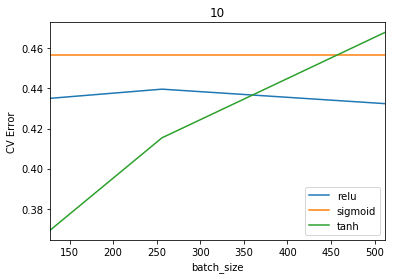

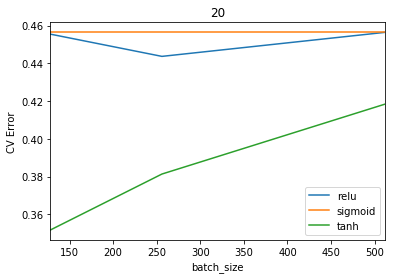

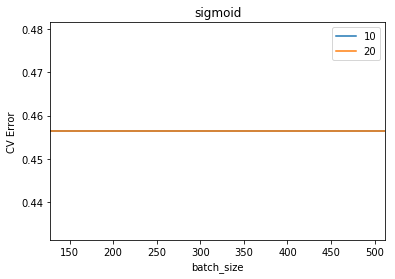

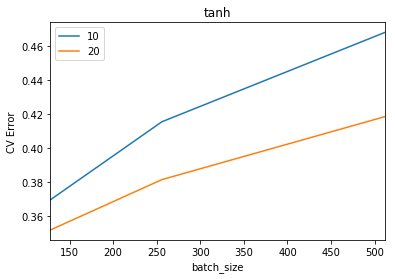

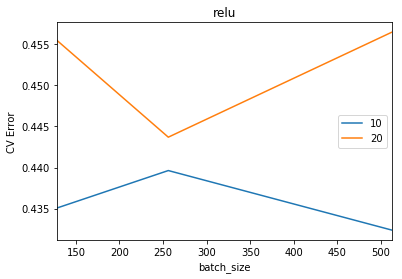

In [11]:
for epochs in epoch:
    ann11[0][ann11[0]['epochs']==epochs].pivot(index='batch_size',columns='hidden_activation',values='cv_error').plot()
    plt.title(epochs)
    plt.ylabel('CV Error')
    plt.legend(loc='best')
    plt.show()
    
for activation in hidden_actfunc:
    ann11[0][ann11[0]['hidden_activation']==activation].pivot(index='batch_size',columns='epochs',values='cv_error').plot()
    plt.title(activation)
    plt.ylabel('CV Error')
    plt.legend(loc='best')
    plt.show()

In [12]:
ann11[0].sort_values(by='cv_error',ascending=True).head(5)

,hidden_activation,hidden_units_1,hidden_units_2,batch_size,epochs,cv_error,run_time
4,tanh,12,8,128,20,0.351723,3.055266
1,tanh,12,8,128,10,0.369458,1.815457
10,tanh,12,8,256,20,0.381366,2.943501
7,tanh,12,8,256,10,0.415379,1.651191
16,tanh,12,8,512,20,0.418419,2.712111


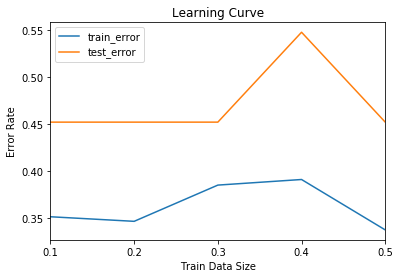

In [14]:
best_params11 = {'hidden_actfunc':['tanh'],'batch_size':[128],'epochs':[20],
                 'hidden_units_1':[nodes[0]],'hidden_units_2':[nodes[1]]}

ann_best11 = ann2_best(train1,test1,best_params11)

ann_best11.plot(x='train_size',y=['train_error','test_error'])
plt.title('Learning Curve')
plt.xlabel('Train Data Size')
plt.ylabel('Error Rate')
plt.xticks(np.arange(0.1,0.6,0.1))
plt.legend(loc='best')
plt.show()

In [10]:
ann12_hid = ann_2hid(X_train1,y_train1,X_train1.shape[1],params2)
ann12 = ann2_grid(train1,test1,ann12_hid)

test accuracy of best model : 0.5478


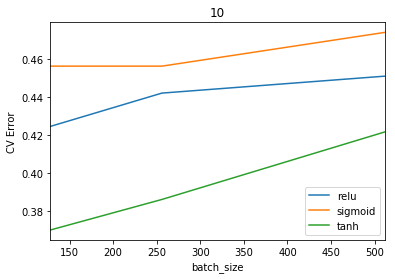

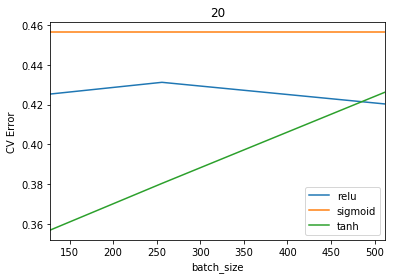

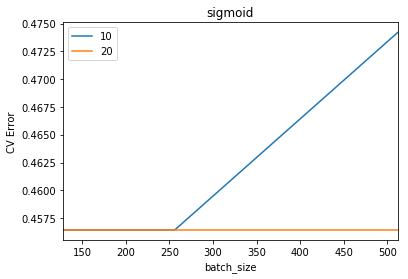

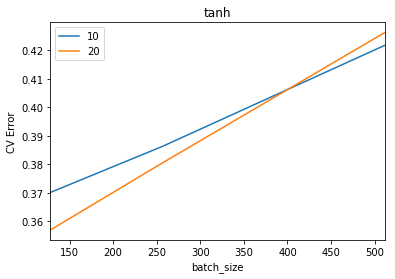

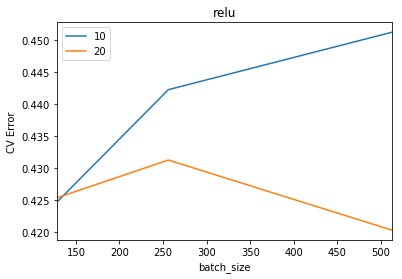

In [11]:
for epochs in epoch:
    ann12[0][ann12[0]['epochs']==epochs].pivot(index='batch_size',columns='hidden_activation',values='cv_error').plot()
    plt.title(epochs)
    plt.ylabel('CV Error')
    plt.legend(loc='best')
    plt.show()
    
for activation in hidden_actfunc:
    ann12[0][ann12[0]['hidden_activation']==activation].pivot(index='batch_size',columns='epochs',values='cv_error').plot()
    plt.title(activation)
    plt.ylabel('CV Error')
    plt.legend(loc='best')
    plt.show()

In [12]:
ann12[0].sort_values(by='cv_error',ascending=True).head(5)

,hidden_activation,hidden_units_1,hidden_units_2,batch_size,epochs,cv_error,run_time
4,tanh,15,10,128,20,0.356980,5.707554
1,tanh,15,10,128,10,0.370155,3.193454
10,tanh,15,10,256,20,0.380416,5.049271
7,tanh,15,10,256,10,0.386243,3.304086
17,relu,15,10,512,20,0.420383,5.141678


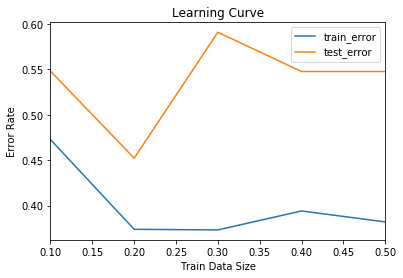

In [14]:
best_params12 = {'hidden_actfunc':['tanh'],'batch_size':[128],'epochs':[20],
                 'hidden_units_1':[nodes[1]],'hidden_units_2':[nodes[2]]}

ann_best12 = ann2_best(train1,test1,best_params12)

ann_best12.plot(x='train_size',y=['train_error','test_error'])
plt.title('Learning Curve')
plt.xlabel('Train Data Size')
plt.ylabel('Error Rate')
plt.legend(loc='best')
plt.show()

##### 3 Hidden Layers

In [15]:
ann13_hid = ann_3hid(X_train1,y_train1,X_train1.shape[1],params3)
ann13 = ann3_grid(train1,test1,ann13_hid)

test accuracy of best model : 0.5478


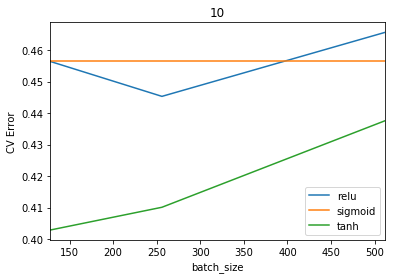

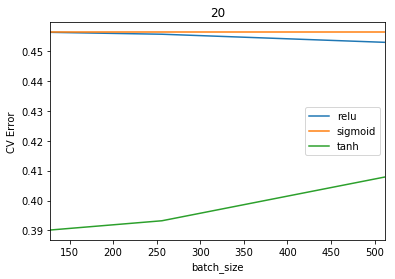

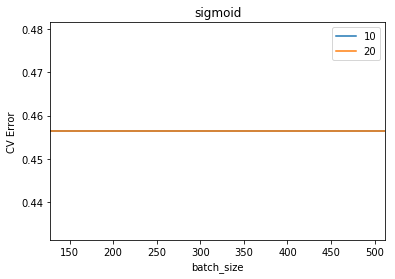

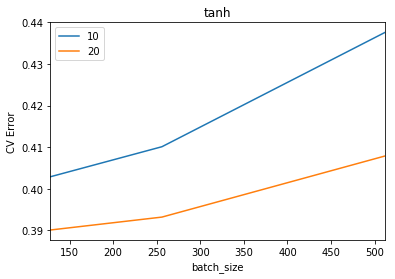

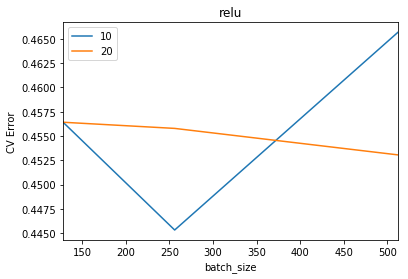

In [16]:
for epochs in epoch:
    ann13[0][ann13[0]['epochs']==epochs].pivot(index='batch_size',columns='hidden_activation',values='cv_error').plot()
    plt.title(epochs)
    plt.ylabel('CV Error')
    plt.legend(loc='best')
    plt.show()
    
for activation in hidden_actfunc:
    ann13[0][ann13[0]['hidden_activation']==activation].pivot(index='batch_size',columns='epochs',values='cv_error').plot()
    plt.title(activation)
    plt.ylabel('CV Error')
    plt.legend(loc='best')
    plt.show()

In [17]:
ann13[0].sort_values(by='cv_error',ascending=True).head(5)

,hidden_activation,hidden_units_1,hidden_units_2,hidden_units_3,batch_size,epochs,cv_error,run_time
4,tanh,20,15,10,128,20,0.390106,3.776455
10,tanh,20,15,10,256,20,0.393210,4.370292
1,tanh,20,15,10,128,10,0.402901,2.060984
16,tanh,20,15,10,512,20,0.407905,7.711031
7,tanh,20,15,10,256,10,0.410122,2.916205


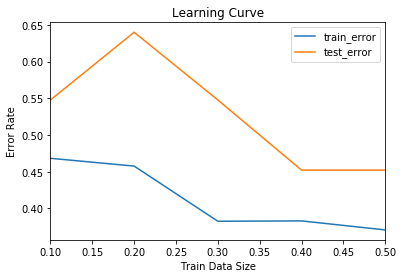

In [19]:
best_params13 = {'hidden_actfunc':['tanh'],'batch_size':[128],'epochs':[20],
                 'hidden_units_1':[nodes[0]],'hidden_units_2':[nodes[1]],'hidden_units_3':[nodes[2]]}

ann_best13 = ann3_best(train1,test1,best_params13)

ann_best13.plot(x='train_size',y=['train_error','test_error'])
plt.title('Learning Curve')
plt.xlabel('Train Data Size')
plt.ylabel('Error Rate')
plt.legend(loc='best')
plt.show()

In [12]:
ann14_hid = ann_3hid(X_train1,y_train1,X_train1.shape[1],params4)
ann14 = ann3_grid(train1,test1,ann14_hid)

test accuracy of best model : 0.5478


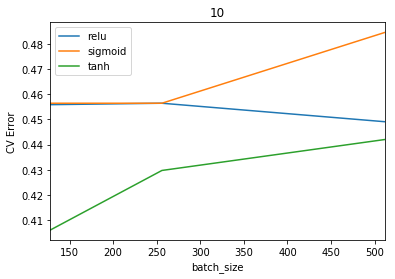

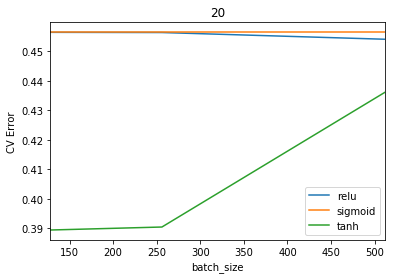

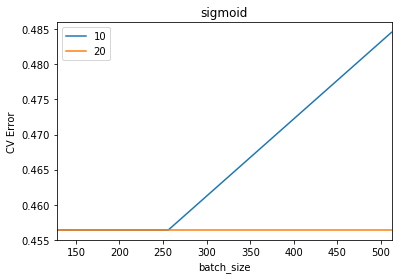

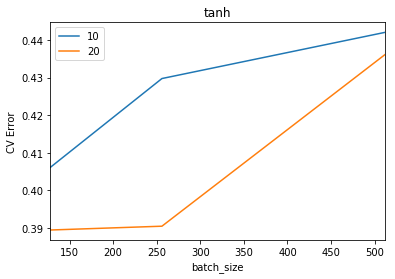

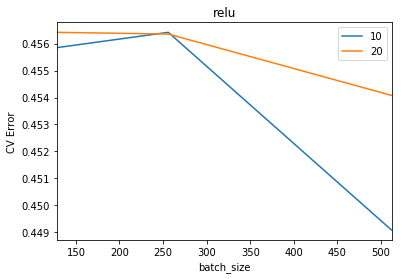

In [13]:
for epochs in epoch:
    ann14[0][ann14[0]['epochs']==epochs].pivot(index='batch_size',columns='hidden_activation',values='cv_error').plot()
    plt.title(epochs)
    plt.ylabel('CV Error')
    plt.legend(loc='best')
    plt.show()
    
for activation in hidden_actfunc:
    ann14[0][ann14[0]['hidden_activation']==activation].pivot(index='batch_size',columns='epochs',values='cv_error').plot()
    plt.title(activation)
    plt.ylabel('CV Error')
    plt.legend(loc='best')
    plt.show()

In [14]:
ann14[0].sort_values(by='cv_error',ascending=True).head(5)

,hidden_activation,hidden_units_1,hidden_units_2,hidden_units_3,batch_size,epochs,cv_error,run_time
4,tanh,15,10,5,128,20,0.389473,4.157423
10,tanh,15,10,5,256,20,0.390486,17.681473
1,tanh,15,10,5,128,10,0.406131,2.145175
7,tanh,15,10,5,256,10,0.429757,3.031560
16,tanh,15,10,5,512,20,0.436154,72.511908


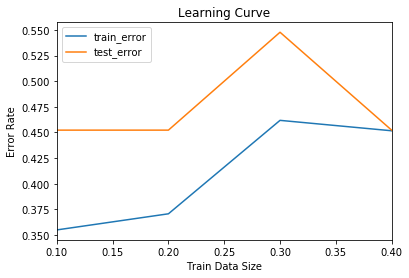

In [15]:
best_params14 = {'hidden_actfunc':['tanh'],'batch_size':[128],'epochs':[20],
                 'hidden_units_1':[nodes[1]],'hidden_units_2':[nodes[2]],'hidden_units_3':[nodes[3]]}

ann_best14 = ann3_best(train1,test1,best_params14)

ann_best14.plot(x='train_size',y=['train_error','test_error'])
plt.title('Learning Curve')
plt.xlabel('Train Data Size')
plt.ylabel('Error Rate')
plt.legend(loc='best')
plt.show()

##### Nearest Neighbors

In [9]:
knn1 = knn(train1,test1)

test accuracy of best model : 0.4525


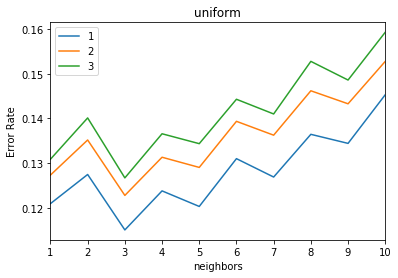

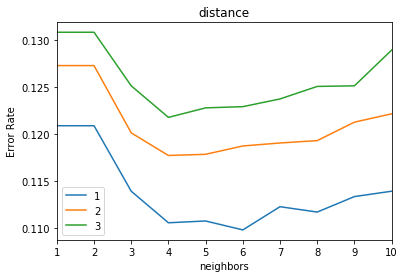

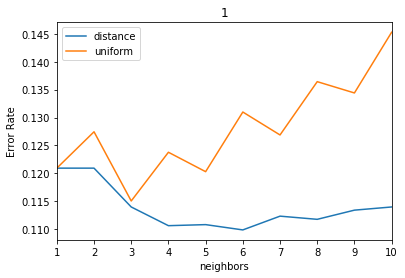

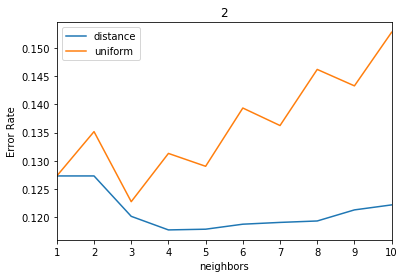

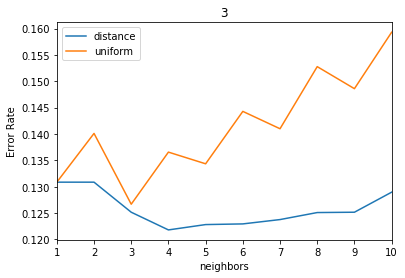

In [17]:
for weight in ['uniform','distance']:
    knn1[0][knn1[0]['weights']==weight].pivot(index='neighbors',columns='p',values='cv_error').plot()
    plt.title(weight)
    plt.ylabel('Error Rate')
    plt.legend(loc='best')
    plt.show()
    
for p in [1,2,3]:
    knn1[0][knn1[0]['p']==p].pivot(index='neighbors',columns='weights',values='cv_error').plot()
    plt.title(p)
    plt.ylabel('Error Rate')
    plt.legend(loc='best')
    plt.show()

In [18]:
knn1[0].sort_values(by='cv_error',ascending=True).head(5)

,neighbors,weights,p,cv_error,run_time
31,6,distance,1,0.10983,0.067164
19,4,distance,1,0.11059,0.063505
25,5,distance,1,0.11078,0.065841
43,8,distance,1,0.11173,0.075475
37,7,distance,1,0.11230,0.062166


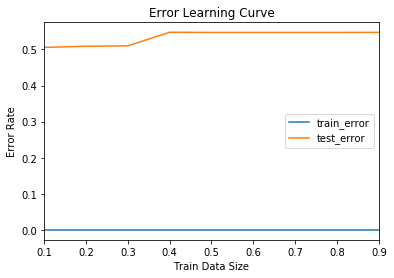

In [20]:
knn1_best = knn_best(train1,test1,neighbors=6,weights='distance',p=1)

knn1_best.plot(x='train_size',y=['train_error','test_error'])
plt.title('Learning Curve')
plt.xlabel('Train Data Size')
plt.ylabel('Error Rate')
plt.legend(loc='best')
plt.show()

### Dataset 2 - Online Shoppers Purchasing Intention

##### Neural Networks

In [10]:
hidden_actfunc = ['sigmoid','tanh','relu']
batch_size = [128,256,512]
epoch = [10,20]
nodes = [20,15,10,5]

params1 = {'hidden_actfunc':hidden_actfunc,'batch_size':batch_size,'epochs':epoch,
           'hidden_units_1':[nodes[0]],'hidden_units_2':[nodes[1]]}

params2 = {'hidden_actfunc':hidden_actfunc,'batch_size':batch_size,'epochs':epoch,
           'hidden_units_1':[nodes[1]],'hidden_units_2':[nodes[2]]}

params3 = {'hidden_actfunc':hidden_actfunc,'batch_size':batch_size,'epochs':epoch,
           'hidden_units_1':[nodes[0]],'hidden_units_2':[nodes[1]],'hidden_units_3':[nodes[2]]}

params4 = {'hidden_actfunc':hidden_actfunc,'batch_size':batch_size,'epochs':epoch,
           'hidden_units_1':[nodes[1]],'hidden_units_2':[nodes[2]],'hidden_units_3':[nodes[3]]}

# params1 = {'hidden_layer_sizes':[nodes[0],nodes[1]],
#            'activation':hidden_actfunc,'batch_size':batch_size,'max_iter':epochs}

# params2 = {'hidden_layer_sizes':[nodes[1],nodes[2]],
#            'activation':hidden_actfunc,'batch_size':batch_size,'max_iter':epochs}

# params3 = {'hidden_layer_sizes':[nodes[0],nodes[1],nodes[2]],
#            'activation':hidden_actfunc,'batch_size':batch_size,'max_iter':epochs}

# params4 = {'hidden_layer_sizes':[nodes[1],nodes[2],nodes[3]],
#            'activation':hidden_actfunc,'batch_size':batch_size,'max_iter':epochs}

##### 2 Hidden Layers

In [11]:
ann21_hid = ann_2hid(X_train2,y_train2,X_train2.shape[1],params1)
ann21 = ann2_grid(train2,test2,ann21_hid)

test accuracy of best model : 0.8516


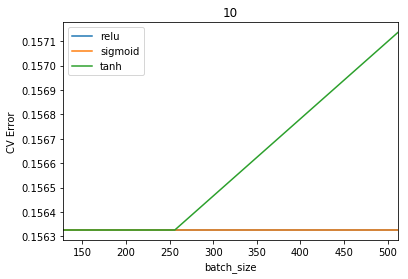

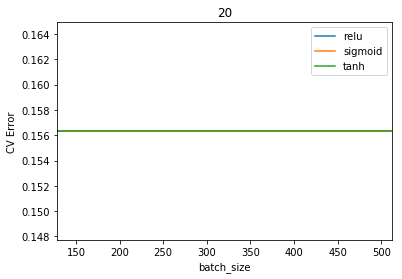

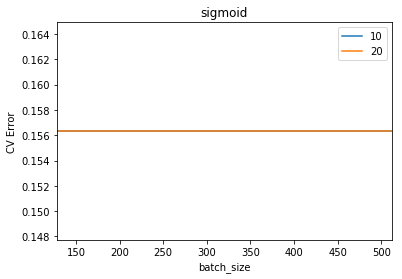

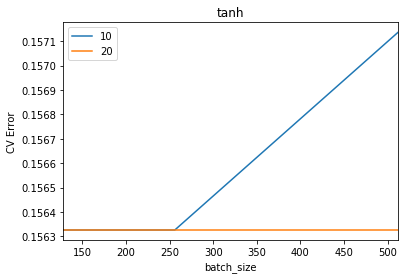

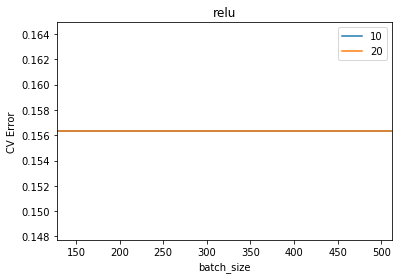

In [12]:
for epochs in epoch:
    ann21[0][ann21[0]['epochs']==epochs].pivot(index='batch_size',columns='hidden_activation',values='cv_error').plot()
    plt.title(epochs)
    plt.ylabel('CV Error')
    plt.legend(loc='best')
    plt.show()
    
for activation in hidden_actfunc:
    ann21[0][ann21[0]['hidden_activation']==activation].pivot(index='batch_size',columns='epochs',values='cv_error').plot()
    plt.title(activation)
    plt.ylabel('CV Error')
    plt.legend(loc='best')
    plt.show()

In [15]:
ann21[0].sort_values(by='cv_error',ascending=True).head(10)

,hidden_activation,hidden_units_1,hidden_units_2,batch_size,epochs,cv_error,run_time
0,sigmoid,20,15,128,10,0.156326,2.432146
15,sigmoid,20,15,512,20,0.156326,2.600145
14,relu,20,15,512,10,0.156326,1.991291
12,sigmoid,20,15,512,10,0.156326,1.829508
11,relu,20,15,256,20,0.156326,2.440866
10,tanh,20,15,256,20,0.156326,2.259876
9,sigmoid,20,15,256,20,0.156326,2.244711
16,tanh,20,15,512,20,0.156326,2.844721
8,relu,20,15,256,10,0.156326,1.787844
6,sigmoid,20,15,256,10,0.156326,1.519786


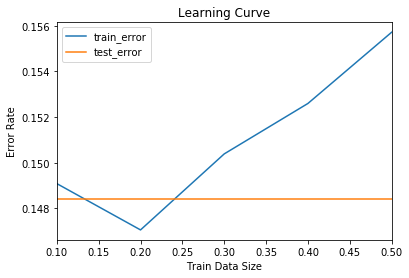

In [16]:
best_params21 = {'hidden_actfunc':['tanh'],'batch_size':[128],'epochs':[20],
                 'hidden_units_1':[nodes[0]],'hidden_units_2':[nodes[1]]}

ann_best21 = ann2_best(train2,test2,best_params21)

ann_best21.plot(x='train_size',y=['train_error','test_error'])
plt.title('Learning Curve')
plt.xlabel('Train Data Size')
plt.ylabel('Error Rate')
plt.legend(loc='best')
plt.show()

In [10]:
ann22_hid = ann_2hid(X_train2,y_train2,X_train2.shape[1],params2)
ann22 = ann2_grid(train2,test2,ann22_hid)

test accuracy of best model : 0.8516


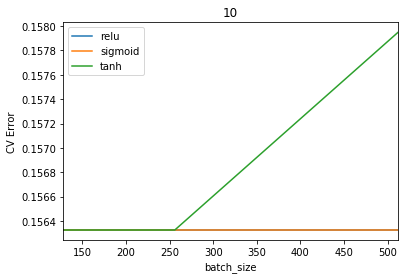

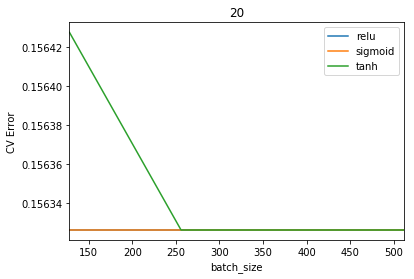

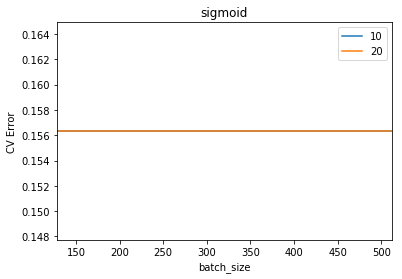

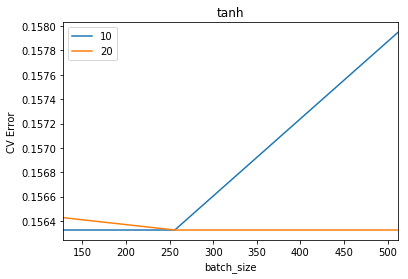

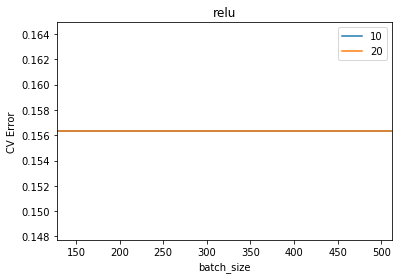

In [11]:
for epochs in epoch:
    ann22[0][ann22[0]['epochs']==epochs].pivot(index='batch_size',columns='hidden_activation',values='cv_error').plot()
    plt.title(epochs)
    plt.ylabel('CV Error')
    plt.legend(loc='best')
    plt.show()
    
for activation in hidden_actfunc:
    ann22[0][ann22[0]['hidden_activation']==activation].pivot(index='batch_size',columns='epochs',values='cv_error').plot()
    plt.title(activation)
    plt.ylabel('CV Error')
    plt.legend(loc='best')
    plt.show()

In [12]:
ann22[0].sort_values(by='cv_error',ascending=True).head(10)

,hidden_activation,hidden_units_1,hidden_units_2,batch_size,epochs,cv_error,run_time
0,sigmoid,15,10,128,10,0.156326,1.252504
15,sigmoid,15,10,512,20,0.156326,2.555910
14,relu,15,10,512,10,0.156326,2.025156
12,sigmoid,15,10,512,10,0.156326,2.181050
11,relu,15,10,256,20,0.156326,2.281132
10,tanh,15,10,256,20,0.156326,2.268304
9,sigmoid,15,10,256,20,0.156326,2.155917
16,tanh,15,10,512,20,0.156326,2.609119
8,relu,15,10,256,10,0.156326,1.641058
6,sigmoid,15,10,256,10,0.156326,1.485859


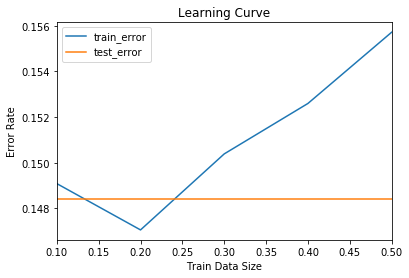

In [13]:
best_params22 = {'hidden_actfunc':['sigmoid'],'batch_size':[128],'epochs':[20],
                 'hidden_units_1':[nodes[1]],'hidden_units_2':[nodes[2]]}

ann_best22 = ann2_best(train2,test2,best_params22)

ann_best22.plot(x='train_size',y=['train_error','test_error'])
plt.title('Learning Curve')
plt.xlabel('Train Data Size')
plt.ylabel('Error Rate')
plt.legend(loc='best')
plt.show()

##### 3 Hidden Layers

In [10]:
ann23_hid = ann_3hid(X_train2,y_train2,X_train2.shape[1],params3)
ann23 = ann3_grid(train2,test2,ann23_hid)

test accuracy of best model : 0.8516


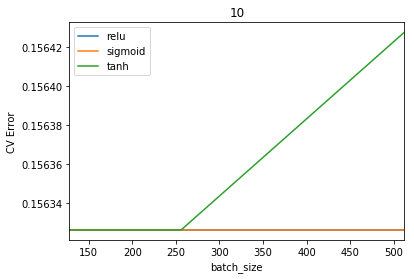

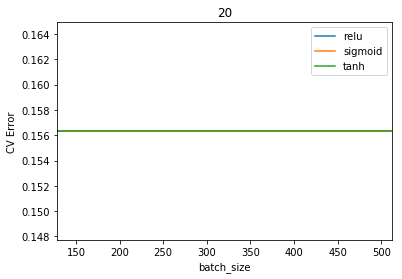

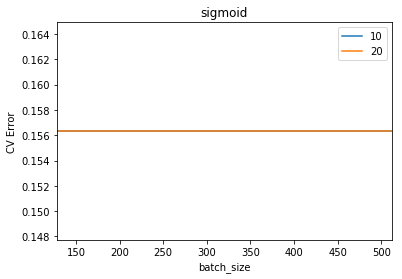

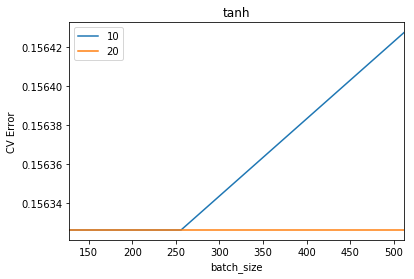

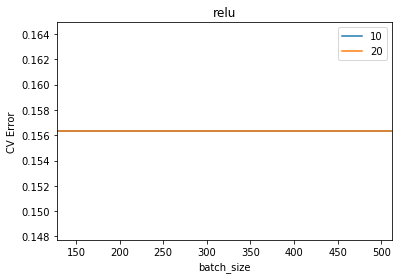

In [11]:
for epochs in epoch:
    ann23[0][ann23[0]['epochs']==epochs].pivot(index='batch_size',columns='hidden_activation',values='cv_error').plot()
    plt.title(epochs)
    plt.ylabel('CV Error')
    plt.legend(loc='best')
    plt.show()
    
for activation in hidden_actfunc:
    ann23[0][ann23[0]['hidden_activation']==activation].pivot(index='batch_size',columns='epochs',values='cv_error').plot()
    plt.title(activation)
    plt.ylabel('CV Error')
    plt.legend(loc='best')
    plt.show()

In [12]:
ann23[0].sort_values(by='cv_error',ascending=True).head(10)

,hidden_activation,hidden_units_1,hidden_units_2,hidden_units_3,batch_size,epochs,cv_error,run_time
0,sigmoid,20,15,10,128,10,0.156326,1.613194
15,sigmoid,20,15,10,512,20,0.156326,6.356117
14,relu,20,15,10,512,10,0.156326,4.597821
12,sigmoid,20,15,10,512,10,0.156326,3.633782
11,relu,20,15,10,256,20,0.156326,3.801230
10,tanh,20,15,10,256,20,0.156326,3.779773
9,sigmoid,20,15,10,256,20,0.156326,3.319474
16,tanh,20,15,10,512,20,0.156326,6.315148
8,relu,20,15,10,256,10,0.156326,2.594699
6,sigmoid,20,15,10,256,10,0.156326,2.417513


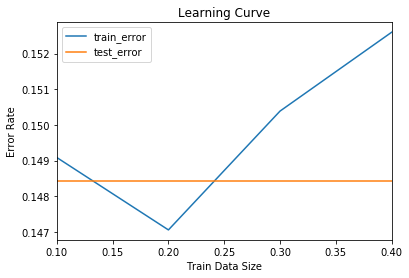

In [13]:
best_params23 = {'hidden_actfunc':['sigmoid'],'batch_size':[128],'epochs':[20],
                 'hidden_units_1':[nodes[0]],'hidden_units_2':[nodes[1]],'hidden_units_3':[nodes[2]]}

ann_best23 = ann3_best(train2,test2,best_params23)

ann_best23.plot(x='train_size',y=['train_error','test_error'])
plt.title('Learning Curve')
plt.xlabel('Train Data Size')
plt.ylabel('Error Rate')
plt.legend(loc='best')
plt.show()

In [10]:
ann24_hid = ann_3hid(X_train2,y_train2,X_train2.shape[1],params4)
ann24 = ann3_grid(train2,test2,ann24_hid)

test accuracy of best model : 0.8516


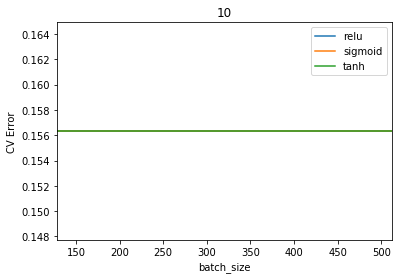

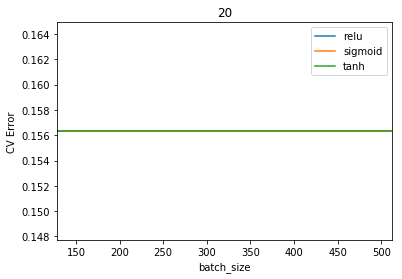

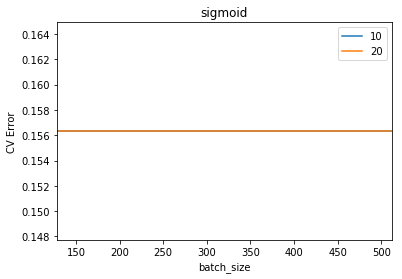

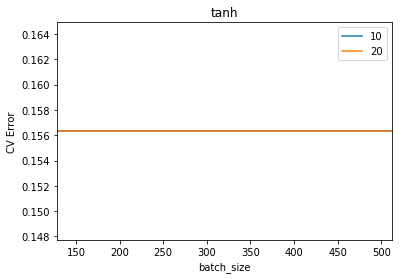

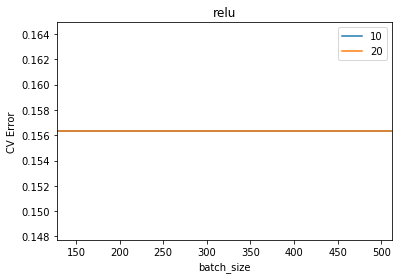

In [11]:
for epochs in epoch:
    ann24[0][ann24[0]['epochs']==epochs].pivot(index='batch_size',columns='hidden_activation',values='cv_error').plot()
    plt.title(epochs)
    plt.ylabel('CV Error')
    plt.legend(loc='best')
    plt.show()
    
for activation in hidden_actfunc:
    ann24[0][ann24[0]['hidden_activation']==activation].pivot(index='batch_size',columns='epochs',values='cv_error').plot()
    plt.title(activation)
    plt.ylabel('CV Error')
    plt.legend(loc='best')
    plt.show()

In [12]:
ann24[0].sort_values(by='cv_error',ascending=True).head(10)

,hidden_activation,hidden_units_1,hidden_units_2,hidden_units_3,batch_size,epochs,cv_error,run_time
0,sigmoid,15,10,5,128,10,0.156326,2.110144
15,sigmoid,15,10,5,512,20,0.156326,9.168607
14,relu,15,10,5,512,10,0.156326,7.912180
13,tanh,15,10,5,512,10,0.156326,7.179890
12,sigmoid,15,10,5,512,10,0.156326,6.371267
11,relu,15,10,5,256,20,0.156326,6.739339
10,tanh,15,10,5,256,20,0.156326,6.482836
9,sigmoid,15,10,5,256,20,0.156326,6.263362
8,relu,15,10,5,256,10,0.156326,4.871544
7,tanh,15,10,5,256,10,0.156326,4.636629


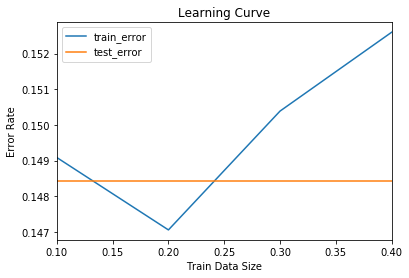

In [14]:
best_params24 = {'hidden_actfunc':['sigmoid'],'batch_size':[128],'epochs':[20],
                 'hidden_units_1':[nodes[1]],'hidden_units_2':[nodes[2]],'hidden_units_3':[nodes[3]]}

ann_best24 = ann3_best(train2,test2,best_params24)

ann_best24.plot(x='train_size',y=['train_error','test_error'])
plt.title('Learning Curve')
plt.xlabel('Train Data Size')
plt.ylabel('Error Rate')
plt.legend(loc='best')
plt.show()

##### Nearest Neighbors

In [10]:
knn2 = knn(train2,test2)

test accuracy of best model : 0.8552


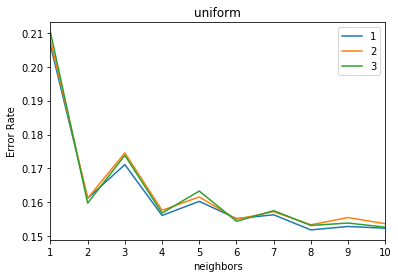

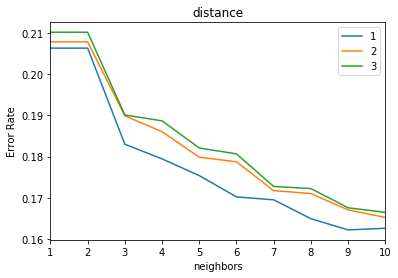

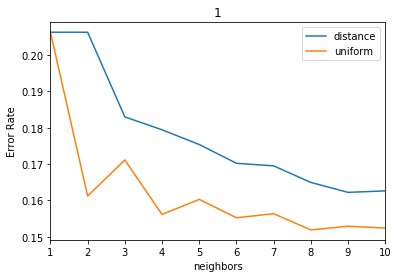

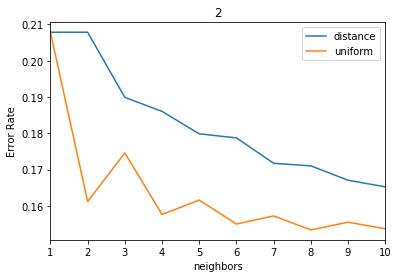

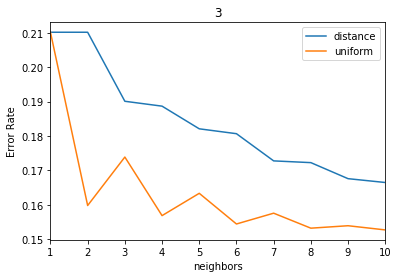

In [11]:
for weight in ['uniform','distance']:
    knn2[0][knn2[0]['weights']==weight].pivot(index='neighbors',columns='p',values='cv_error').plot()
    plt.title(weight)
    plt.ylabel('Error Rate')
    plt.legend(loc='best')
    plt.show()
    
for p in [1,2,3]:
    knn2[0][knn2[0]['p']==p].pivot(index='neighbors',columns='weights',values='cv_error').plot()
    plt.title(p)
    plt.ylabel('Error Rate')
    plt.legend(loc='best')
    plt.show()

In [12]:
knn2[0].sort_values(by='cv_error',ascending=True).head(5)

,neighbors,weights,p,cv_error,run_time
42,8,uniform,1,0.151865,0.032921
54,10,uniform,1,0.152372,0.038897
58,10,uniform,3,0.152676,0.033244
48,9,uniform,1,0.152879,0.032598
46,8,uniform,3,0.153183,0.036580


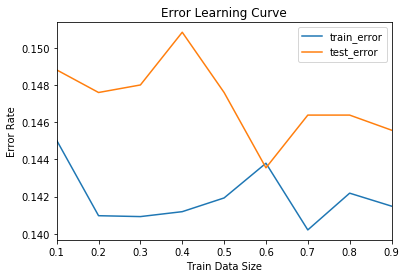

In [16]:
knn2_best = knn_best(train2,test2,neighbors=8,weights='uniform',p=1)

knn2_best.plot(x='train_size',y=['train_error','test_error'])
plt.title('Learning Curve')
plt.xlabel('Train Data Size')
plt.ylabel('Error Rate')
plt.legend(loc='best')
plt.show()